In [1]:
!conda list

# packages in environment at C:\Users\foxir\miniconda3\envs\gunshot_tf:
#
# Name                    Version                   Build  Channel
absl-py                   2.1.0                    pypi_0    pypi
asttokens                 3.0.0                    pypi_0    pypi
astunparse                1.6.3                    pypi_0    pypi
audiomentations           0.38.0                   pypi_0    pypi
audioread                 3.0.1                    pypi_0    pypi
bzip2                     1.0.8                h2466b09_7    conda-forge
ca-certificates           2024.12.14           h56e8100_0    conda-forge
cachetools                5.5.0                    pypi_0    pypi
certifi                   2024.12.14               pypi_0    pypi
cffi                      1.17.1                   pypi_0    pypi
charset-normalizer        3.4.0                    pypi_0    pypi
colorama                  0.4.6                    pypi_0    pypi
comm                      0.2.2                    py

In [31]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio
import numpy as np
import glob
import random
import csv

In [2]:
!python -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
data = os.path.join('belize-data')
val_NEG = os.path.join('belize-data', 'Validation data', 'Background')
val_POS = os.path.join('belize-data', 'Validation data', 'Gunshot')
model_dir = os.path.join('C', 'Users', 'foxir', 'OneDrive', 'Desktop', 'Smart Rock', 'gunshot-detection-models', '1-5-25', '1-5-25,B-Dataset,30mPara,4E.keras')
outputs_dir = os.path.join('outputs')
background_wav = os.path.join('belize-data', 'Training data', 'Background', '5B1E8E78.wav')
gunshot_wav = os.path.join('belize-data', 'Training data', 'Gunshot', '5B9FE44F_3709e9f5ff-aa0a-4ba9-9e61-d64d9666527614b02738-a1c6-43fb-b13e-0651261d1ca002c1d2c0-064c-4f43-b3a6-9da25d3e0930.wav')

In [33]:
loaded_model = tf.keras.models.load_model('1-3-25,Belize-Dataset,30mPara20E.keras')

In [5]:
data = [('file1',1),('file2',1),('file3',1),('file4',0)]

results = []

for i in data:
    filename = i[0]
    label = i[1]
    yhat = label*0.75
    results.append((filename, yhat, label))

In [6]:
results

[('file1', 0.75, 1), ('file2', 0.75, 1), ('file3', 0.75, 1), ('file4', 0.0, 0)]

In [7]:
val_neg = glob.glob(val_NEG+'/*.wav')
val_pos = glob.glob(val_POS+'/*.wav')

In [8]:
print(len(val_neg))
print(len(val_pos))

7040
150


In [9]:
val_neg = list(zip(val_neg, [0]*len(val_neg)))
val_pos = list(zip(val_pos, [1]*len(val_pos)))

In [10]:
val_data = val_neg+val_pos

In [11]:
random.shuffle(val_data)

In [12]:
val_data

[('belize-data\\Validation data\\Background\\5B0A5C53.WAV', 0),
 ('belize-data\\Validation data\\Background\\5AECA3AF.WAV', 0),
 ('belize-data\\Validation data\\Background\\5B02F3E0.WAV', 0),
 ('belize-data\\Validation data\\Background\\601D3653.WAV', 0),
 ('belize-data\\Validation data\\Background\\5ADCCDA3.WAV', 0),
 ('belize-data\\Validation data\\Background\\5AF9B305.WAV', 0),
 ('belize-data\\Validation data\\Background\\5AEB61C8.WAV', 0),
 ('belize-data\\Validation data\\Background\\5ADA1D11.WAV', 0),
 ('belize-data\\Validation data\\Background\\5AEC49EC.WAV', 0),
 ('belize-data\\Validation data\\Background\\5AD24194.WAV', 0),
 ('belize-data\\Validation data\\Background\\5B059EF7.WAV', 0),
 ('belize-data\\Validation data\\Background\\5B17264A.WAV', 0),
 ('belize-data\\Validation data\\Background\\5ACD0BF9.WAV', 0),
 ('belize-data\\Validation data\\Background\\601AA9D8.WAV', 0),
 ('belize-data\\Validation data\\Background\\5ACA0613.WAV', 0),
 ('belize-data\\Validation data\\Backgro

In [17]:
nwav = load_wav_8k_mono(background_wav)
wav = load_wav_8k_mono(gunshot_wav)

In [18]:
nspectrogram, label = preprocess_mel(nwav, 0)
spectrogram, label = preprocess_mel(wav, 1)

Wav Shape: (32000,)
STFT Shape1: (249, 129)
STFT Shape2: (249, 129)
Mel Filterbank Shape: (129, 64)
Mel Spectrogram Shape1: (249, 64)
Mel Spectrogram Shape2: (249, 64, 1)
Wav Shape: (32000,)
STFT Shape1: (249, 129)
STFT Shape2: (249, 129)
Mel Filterbank Shape: (129, 64)
Mel Spectrogram Shape1: (249, 64)
Mel Spectrogram Shape2: (249, 64, 1)


(1, 249, 64, 1)


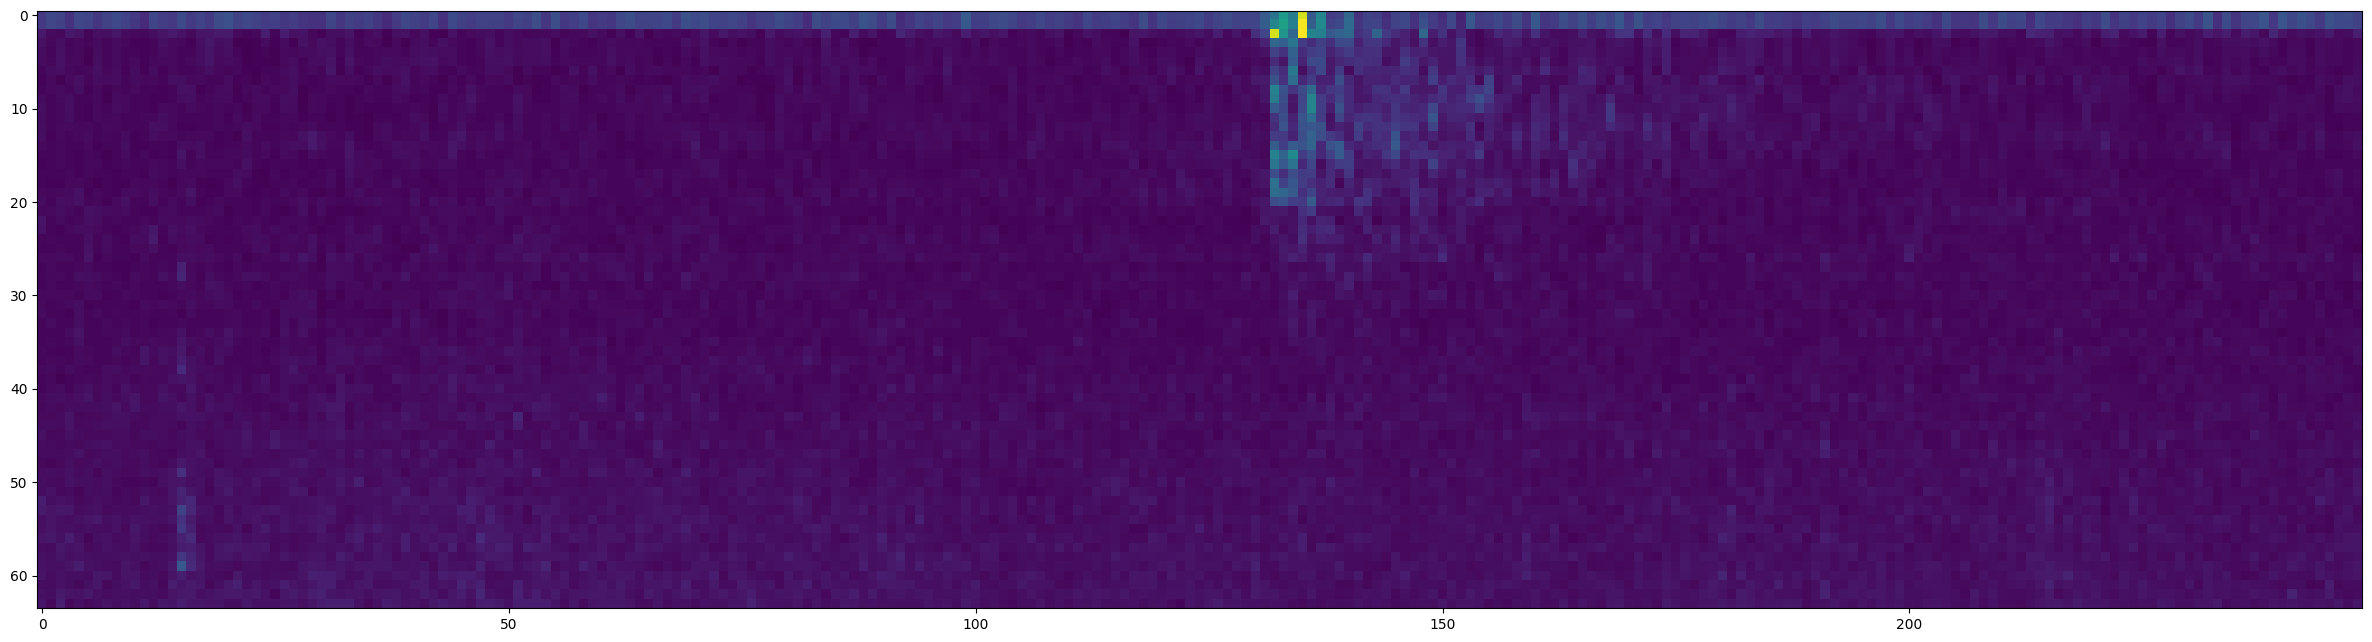

In [38]:
print(spectrogram.shape)
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [21]:
nspectrogram = nspectrogram[np.newaxis, :]
spectrogram = spectrogram[np.newaxis, :]

In [39]:
print(nspectrogram.shape)
print(spectrogram.shape)

(1, 249, 64, 1)
(1, 249, 64, 1)


In [40]:
yhat0 = loaded_model.predict(nspectrogram)
yhat1 = loaded_model.predict(spectrogram)

In [41]:
print(yhat0)
print(yhat1)

[[0.00245534]]
[[0.47160277]]


In [36]:
results = []

def create_results(dataset):
    for i in dataset:
        filepath = i[0]
        filename = filepath.replace('belize-data\\Validation data\\','')
        label = i[1]
        wav = load_wav_8k_mono(filepath)
        spectrogram, label = preprocess_mel(wav, label)
        spectrogram = spectrogram[np.newaxis, :]
        yhat = loaded_model.predict(spectrogram)
        results.append((filename, yhat, label))
    return results

In [ ]:
create_results(val_data)

Wav Shape: (32000,)
STFT Shape1: (249, 129)
STFT Shape2: (249, 129)
Mel Filterbank Shape: (129, 64)
Mel Spectrogram Shape1: (249, 64)
Mel Spectrogram Shape2: (249, 64, 1)
Wav Shape: (32000,)
STFT Shape1: (249, 129)
STFT Shape2: (249, 129)
Mel Filterbank Shape: (129, 64)
Mel Spectrogram Shape1: (249, 64)
Mel Spectrogram Shape2: (249, 64, 1)
Wav Shape: (32000,)
STFT Shape1: (249, 129)
STFT Shape2: (249, 129)
Mel Filterbank Shape: (129, 64)
Mel Spectrogram Shape1: (249, 64)
Mel Spectrogram Shape2: (249, 64, 1)
Wav Shape: (32000,)
STFT Shape1: (249, 129)
STFT Shape2: (249, 129)
Mel Filterbank Shape: (129, 64)
Mel Spectrogram Shape1: (249, 64)
Mel Spectrogram Shape2: (249, 64, 1)
Wav Shape: (32000,)
STFT Shape1: (249, 129)
STFT Shape2: (249, 129)
Mel Filterbank Shape: (129, 64)
Mel Spectrogram Shape1: (249, 64)
Mel Spectrogram Shape2: (249, 64, 1)
Wav Shape: (32000,)
STFT Shape1: (249, 129)
STFT Shape2: (249, 129)
Mel Filterbank Shape: (129, 64)
Mel Spectrogram Shape1: (249, 64)
Mel Spectro

In [32]:
with open('results0-1-3-25.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['filepath','yhat', 'label'])
    for row in results:
        csv_out.writerow(row)

In [14]:
def load_wav_8k_mono(filename):
    try:
        file_contents = tf.io.read_file(filename)
        wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
        sample_rate = tf.cast(sample_rate, dtype=tf.int64)
        if sample_rate != 8000:
            wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=8000)
        wav = tf.squeeze(wav, axis=-1)
    except Exception as e:
        print(f"Invalid file: {filename} - {e}")
    return wav

In [15]:
sample_rate = 8000
mel_spec_length = 32000
frame_length = 256
frame_step = 128
mel_bins = 64
upper_edge = 4000
lower_edge = 0

In [35]:
def preprocess_mel(file_path, label):
    # load wav and make sure length is proper
    if isinstance(file_path, str):
        try:
            wav, label = load_wav_8k_mono(file_path)
        except Exception as e:
            print(f"Failed to load wav file at {file_path} - {e}")
    else:
        wav = file_path

    if len(wav) > 32000:
        wav = wav[:mel_spec_length]
    if len(wav) < 32000:
        try:
            zero_padding = tf.zeros([mel_spec_length] - tf.shape(wav), dtype=tf.float32)
            wav = tf.concat([zero_padding, wav], 0)
        except Exception as e:
            print(f"Failed to pad wav file at {file_path} - {e}")
    
    # create the spectrogram
    spectrogram = tf.signal.stft(wav, frame_length, frame_step, window_fn=tf.signal.hann_window)
    spectrogram = tf.abs(spectrogram)

    # create the mel filterbank
    spec_bins = frame_length // 2 + 1  # Derived from frame length
    mel_filterbank = tf.signal.linear_to_mel_weight_matrix(
        mel_bins,
        spec_bins,
        sample_rate,
        lower_edge,
        upper_edge,
    )
    
    # create the mel spectrogram
    mel_spectrogram = tf.matmul(spectrogram, mel_filterbank)

    # add a dimension
    mel_spectrogram = tf.expand_dims(mel_spectrogram, axis=2)

    return mel_spectrogram, label